In [65]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

ModuleNotFoundError: No module named 'seaborn'

## Load data

- Tabula Muris (nvm)
- Jeong
- Betsholtz
- Kalucka
- Bjornholm

In [ ]:
# tm = pd.read_csv('/home/alc1381/data2/231107_tabula_muris_gpi.csv', comment='#')
# tm_bec = tm.loc[
#     (tm['Tissue'] == 'brain') &
#     (tm['Cell Type'] == 'endothelial cell'),
#     ['Gene Symbol', 'Expression', 'Expression, Scaled', 'Number of Cells Expressing Genes']
# ].sort_values('Gene Symbol')
# tm_bec.head()
# tm.head()

In [66]:
jeong = pd.read_csv('/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/jeong_Adult-Aged_subEC_pseudobulk.csv')
jeong = jeong.rename(columns={col:'jeong_' + col for col in jeong.columns.values[1:]})
jeong.head()

,gene,jeong_Venous,jeong_CapA,jeong_CapV,jeong_REV,jeong_Arterial
0,0610005C13Rik,0.000697,0.001531,0.000450,0.000000,0.000000
1,0610007N19Rik,0.048308,0.078471,0.044024,0.040657,0.053466
2,0610007P14Rik,0.212135,0.223502,0.195429,0.194106,0.335623
3,0610009B14Rik,0.001416,0.000000,0.000159,0.000000,0.000000
4,0610009B22Rik,0.203421,0.225622,0.198178,0.207997,0.194460


In [67]:
kalucka = (
    pd.read_csv('/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/kalucka_all.csv')
    .rename(columns={'Unnamed: 0': 'gene'})
)
kalucka = kalucka.rename(columns={col:'kalucka_' + col for col in kalucka.columns.values[1:]})
# kalucka_lung = pd.read_csv('/home/alc1381/data2/kalucka_endo_atlas/kalucka_lung_ec.csv').iloc[:, 1:]
# kalucka_lung = kalucka_lung.rename(columns={col:'kalucka_lung_' + col for col in kalucka_lung.columns.values})
# kalucka = pd.concat([kalucka_brain, kalucka_lung], axis=1)
kalucka.head()

,gene,kalucka_brain-capillary venous,kalucka_brain-artery shear stress,kalucka_brain-interferon,kalucka_brain-capillary,kalucka_brain-artery,kalucka_brain-capillary arterial,kalucka_brain-large artery,kalucka_brain-choroid plexus,kalucka_brain-large vein,...,kalucka_spleen-interferon,kalucka_spleen-proliferating,kalucka_testis-capillary,kalucka_testis-lymphatic 2,kalucka_testis-lymphatic 1,kalucka_testis-large artery,kalucka_testis-vein,kalucka_testis-artery,kalucka_testis-angiogenic,kalucka_testis-capillary arterial
0,Sox17,1.338535,2.270753,1.333192,1.705754,2.127037,2.026915,1.649971,0.908915,1.420015,...,0.037181,0.158505,1.199325,0.202959,0.167735,2.053078,1.016728,2.398540,0.866240,1.968202
1,Mrpl15,0.303865,0.386182,0.311563,0.253070,0.364368,0.332578,0.240365,0.370056,0.376624,...,0.485163,0.541733,0.339993,0.407223,0.353164,0.328251,0.313316,0.301888,0.416986,0.375970
2,Lypla1,0.399723,0.334887,0.343586,0.349707,0.388868,0.376095,0.298785,0.332956,0.385488,...,0.379844,0.506318,0.336290,0.311897,0.216918,0.268727,0.296520,0.328982,0.440845,0.387496
3,Tcea1,0.366342,0.467813,0.407320,0.367813,0.437895,0.457383,0.423307,0.467834,0.592170,...,0.398231,0.615665,0.376934,0.400175,0.280086,0.447396,0.439033,0.481287,0.426027,0.393691
4,Atp6v1h,0.217915,0.266238,0.146415,0.205320,0.345896,0.211445,0.279363,0.281587,0.226424,...,0.154103,0.038716,0.178334,0.168642,0.146768,0.182976,0.261812,0.106114,0.193440,0.177374


In [68]:
bets_brain = pd.read_csv('/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/bEC_cluster_norm.csv')
bets_brain = bets_brain.rename(columns={col:'bets_brain_' + col for col in bets_brain.columns.values[1:]})

# Rescale bets data
bets_brain.iloc[:, 1:] = bets_brain.iloc[:, 1:].apply(lambda x: (x / 2e5)*1e3, axis=1)
bets_brain.head()

,gene,bets_brain_aEC,bets_brain_capilEC,bets_brain_EC3,bets_brain_vEC,bets_brain_EC2,bets_brain_EC1,bets_brain_MG,bets_brain_PC,bets_brain_vSMC,bets_brain_aSMC,bets_brain_aaSMC,bets_brain_AC,bets_brain_OL,bets_brain_FB2,bets_brain_FB1
0,Adora1,0.000000,0.002272,0.022299,0.006812,0.003175,0.001776,0.005000,0.009770,0.000421,0.016385,0.000000,0.010000,0.498677,0.016735,0.000676
1,Sntg1,0.000000,0.000198,0.000584,0.000000,0.000000,0.000000,0.004286,0.000225,0.000093,0.000000,0.000000,0.003056,0.032871,0.000612,0.000000
2,Prim2,0.009370,0.011543,0.020547,0.009329,0.035000,0.011645,0.090714,0.045414,0.050654,0.035077,0.086333,0.000000,0.165000,0.018163,0.000000
3,Bai3,0.001713,0.000049,0.000401,0.002181,0.035238,0.000088,0.003214,0.002376,0.000000,0.000000,0.000000,0.038611,0.011516,0.001224,0.013243
4,Cflar,0.179106,0.198148,0.139124,0.147416,0.112381,0.416842,0.173929,0.109044,0.054159,0.070462,0.117167,0.087222,0.018290,0.279796,0.051486


In [69]:
bets_lung = pd.read_csv('/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/betsholtz_lung_EC_cluster_norm.csv')
bets_lung = bets_lung.rename(columns={col:'bets_lung_' + col for col in bets_lung.columns.values[1:]})

# Rescale bets data
bets_lung.iloc[:, 1:] = bets_lung.iloc[:, 1:].apply(lambda x: (x / 2e5)*1e3, axis=1)
bets_lung.head()

,gene,bets_lung_capilEC,bets_lung_aEC,bets_lung_cEC1,bets_lung_LEC,bets_lung_EC2,bets_lung_cEC2,bets_lung_cEC3,bets_lung_EC1,bets_lung_Mixed,bets_lung_CP2,bets_lung_PC,bets_lung_FB2,bets_lung_VSMC,bets_lung_FB1,bets_lung_CP1,bets_lung_FB4,bets_lung_FB3
0,Adora1,0.005621,0.044385,0.000000,0.000000,0.000000,0.047561,0.000000,0.001579,0.016886,0.069792,0.048446,0.000000,0.004625,0.003064,0.000000,0.001778,0.004225
1,Sntg1,0.000295,0.001846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002588,0.000000,0.000608,0.001190,0.000000,0.002632,0.000000,0.003889,0.003803
2,Prim2,0.015263,0.019846,0.124231,0.000000,0.000000,0.000000,0.012206,0.000000,0.029211,0.067292,0.085811,0.035595,0.005687,0.059981,0.067391,0.024778,0.054789
3,Bai3,0.003516,0.000231,0.000000,0.000000,0.000000,0.000000,0.001029,0.000000,0.005000,0.000000,0.007770,0.000714,0.001187,0.001805,0.000000,0.002222,0.006408
4,Cflar,0.376274,0.130231,0.244231,0.404242,0.410147,0.421951,0.401912,0.546930,0.261360,0.170625,0.292973,0.188810,0.212688,0.147782,0.087609,0.132333,0.237817


In [70]:
bjornholm = pd.read_csv('/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/bjornholm_pseudobulk.csv')
bjornholm = bjornholm.rename(columns={col:'bjornholm_' + col for col in bjornholm.columns.values[1:]})
bjornholm.head()

,gene,bjornholm_CapEC,bjornholm_ArtlEC,bjornholm_Microglia,bjornholm_VenlEC,bjornholm_FenEC,bjornholm_VSMC,bjornholm_Pericyte,bjornholm_Erythrocyte,bjornholm_ArtEC,bjornholm_VenEC,bjornholm_Myeloid,bjornholm_Astrocyte,bjornholm_B-lymphocyte,bjornholm_ChP epithelial,bjornholm_T-lymphocyte,bjornholm_Fibroblast
0,Rp1,0.005182,0.002863,0.002230,0.014755,0.001678,0.001564,0.000996,0.004220,0.020317,0.012848,0.000000,0.006802,0.000000,0.000000,0.000000,0.000000
1,Sox17,0.903721,1.429032,0.083462,0.953321,0.248307,0.420597,0.462975,0.968391,0.963831,1.023070,0.084599,0.805359,0.192704,0.181035,0.140579,0.013810
2,Gm37587,0.009706,0.017845,0.000301,0.006052,0.004233,0.005237,0.004404,0.011722,0.000000,0.010383,0.000000,0.000000,0.003815,0.000000,0.000000,0.000000
3,Mrpl15,0.186922,0.197464,0.148646,0.260843,0.172171,0.203933,0.223141,0.210945,0.130822,0.260086,0.147188,0.201040,0.151699,0.142729,0.268661,0.106498
4,Lypla1,0.115029,0.128847,0.074263,0.158586,0.095240,0.162478,0.132127,0.135763,0.099436,0.290683,0.068791,0.112869,0.084783,0.180953,0.120041,0.151932


## Load uniprot

In [71]:
uniprot = pd.read_csv(
    '/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/uniprotkb_reviewed_true_AND_model_organ_2024_03_06.tsv', 
    sep='\t')
uniprot.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC]
0,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...
1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E..."
2,A0A0B4J1F4,reviewed,ARRD4_MOUSE,Arrestin domain-containing protein 4,Arrdc4,Mus musculus (Mouse),415,NaN,NaN,SUBCELLULAR LOCATION: Early endosome {ECO:0000...
3,A0A0B4J1G0,reviewed,FCG3A_MOUSE,Low affinity immunoglobulin gamma Fc region re...,Fcgr4 Fcgr3a,Mus musculus (Mouse),249,Fcgr3a,"TRANSMEM 204..224; /note=""Helical""; /evidence=...",SUBCELLULAR LOCATION: Cell membrane {ECO:00002...
4,A0A0B4J1N3,reviewed,GP15L_MOUSE,Protein GPR15LG (Protein GPR15 ligand) (Protei...,Gpr15lg Gpr15l,Mus musculus (Mouse),78,Gpr15l,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250|Un...


In [72]:
uniprot['Genes'] = (
    # Combine gene names and synonyms into a list
    (
        uniprot['Gene Names'].apply(lambda x: x.split(' ') if type(x) is str else [])
        #+
        #uniprot['Gene Names (synonym)'].apply(lambda x: x.split(' ') if type(x) is str else [])
    )
    .apply(lambda x: list(set(x))) # Unique
)
uniprot.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],Genes
0,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,"[Kiaa0442, Auts2]"
1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...","[Iqschfp, Iqcj-Schip1, Schip1]"
2,A0A0B4J1F4,reviewed,ARRD4_MOUSE,Arrestin domain-containing protein 4,Arrdc4,Mus musculus (Mouse),415,NaN,NaN,SUBCELLULAR LOCATION: Early endosome {ECO:0000...,[Arrdc4]
3,A0A0B4J1G0,reviewed,FCG3A_MOUSE,Low affinity immunoglobulin gamma Fc region re...,Fcgr4 Fcgr3a,Mus musculus (Mouse),249,Fcgr3a,"TRANSMEM 204..224; /note=""Helical""; /evidence=...",SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,"[Fcgr4, Fcgr3a]"
4,A0A0B4J1N3,reviewed,GP15L_MOUSE,Protein GPR15LG (Protein GPR15 ligand) (Protei...,Gpr15lg Gpr15l,Mus musculus (Mouse),78,Gpr15l,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250|Un...,"[Gpr15l, Gpr15lg]"


In [73]:
# Transmembrane?
uniprot['has_tm_annotation'] = (~uniprot['Transmembrane'].isna())
uniprot['cell_membrane_localization'] = uniprot['Subcellular location [CC]'].str.contains('Cell membrane').fillna(False)
uniprot['membrane_and_tm'] = (uniprot['has_tm_annotation']) & (uniprot['cell_membrane_localization'])
uniprot.head()

/var/folders/1q/khpcygc10_ggt2mxhm1wdwg00000gn/T/ipykernel_75558/2708924003.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  uniprot['cell_membrane_localization'] = uniprot['Subcellular location [CC]'].str.contains('Cell membrane').fillna(False)


,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],Genes,has_tm_annotation,cell_membrane_localization,membrane_and_tm
0,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,"[Kiaa0442, Auts2]",False,False,False
1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...","[Iqschfp, Iqcj-Schip1, Schip1]",False,False,False
2,A0A0B4J1F4,reviewed,ARRD4_MOUSE,Arrestin domain-containing protein 4,Arrdc4,Mus musculus (Mouse),415,NaN,NaN,SUBCELLULAR LOCATION: Early endosome {ECO:0000...,[Arrdc4],False,True,False
3,A0A0B4J1G0,reviewed,FCG3A_MOUSE,Low affinity immunoglobulin gamma Fc region re...,Fcgr4 Fcgr3a,Mus musculus (Mouse),249,Fcgr3a,"TRANSMEM 204..224; /note=""Helical""; /evidence=...",SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,"[Fcgr4, Fcgr3a]",True,True,True
4,A0A0B4J1N3,reviewed,GP15L_MOUSE,Protein GPR15LG (Protein GPR15 ligand) (Protei...,Gpr15lg Gpr15l,Mus musculus (Mouse),78,Gpr15l,NaN,SUBCELLULAR LOCATION: Secreted {ECO:0000250|Un...,"[Gpr15l, Gpr15lg]",False,False,False


## Join data

In [74]:
# Explode uniprot
uniprot_e = uniprot.explode('Genes').drop_duplicates(subset=['Genes']).set_index('Genes')
uniprot_e.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],has_tm_annotation,cell_membrane_localization,membrane_and_tm
Genes,,,,,,,,,,,,,
Kiaa0442,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,False,False,False
Auts2,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,False,False,False
Iqschfp,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",False,False,False
Iqcj-Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",False,False,False
Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",False,False,False


In [75]:
uniprot_e = (
    uniprot_e
    .join(jeong.set_index('gene'), how='left')
    .join(kalucka.set_index('gene'), how='left')
    .join(bets_brain.set_index('gene'), how='left')
    .join(bets_lung.set_index('gene'), how='left')
    .join(bjornholm.set_index('gene'), how='left')
)
uniprot_e.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],...,bjornholm_Pericyte,bjornholm_Erythrocyte,bjornholm_ArtEC,bjornholm_VenEC,bjornholm_Myeloid,bjornholm_Astrocyte,bjornholm_B-lymphocyte,bjornholm_ChP epithelial,bjornholm_T-lymphocyte,bjornholm_Fibroblast
Genes,,,,,,,,,,,,,,,,,,,,,
Kiaa0442,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auts2,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.097686,0.137003,0.390969,0.907178,0.025558,0.190598,0.010238,0.100040,0.070561,0.624372
Iqschfp,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iqcj-Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,0.131164,0.049715,0.137279,0.081022,0.000000,0.060567,0.000000,0.049424,0.004872,0.000000


In [76]:
# Remove rows without any data
uniprot_e

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],...,bjornholm_Pericyte,bjornholm_Erythrocyte,bjornholm_ArtEC,bjornholm_VenEC,bjornholm_Myeloid,bjornholm_Astrocyte,bjornholm_B-lymphocyte,bjornholm_ChP epithelial,bjornholm_T-lymphocyte,bjornholm_Fibroblast
Genes,,,,,,,,,,,,,,,,,,,,,
Kiaa0442,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auts2,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.097686,0.137003,0.390969,0.907178,0.025558,0.190598,0.010238,0.100040,0.070561,0.624372
Iqschfp,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iqcj-Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,0.131164,0.049715,0.137279,0.081022,0.000000,0.060567,0.000000,0.049424,0.004872,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dexi,Q9WUQ7,reviewed,DEXI_MOUSE,Dexamethasone-induced protein (Protein MYLE),Dexi Myle,Mus musculus (Mouse),95,Myle,NaN,NaN,...,0.104617,0.045168,0.033248,0.115163,0.036996,0.053317,0.060345,0.072138,0.083530,0.187563
Myle,Q9WUQ7,reviewed,DEXI_MOUSE,Dexamethasone-induced protein (Protein MYLE),Dexi Myle,Mus musculus (Mouse),95,Myle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lenep,Q9WVB6,reviewed,LENEP_MOUSE,Lens epithelial cell protein LEP503,Lenep Lep503,Mus musculus (Mouse),61,Lep503,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data_cols = (
    jeong.columns.values.tolist()[1:] + 
    kalucka.columns.values.tolist()[1:] + 
    bets_brain.columns.values.tolist()[1:] +
    bets_lung.columns.values.tolist()[1:] +
    bjornholm.columns.values.tolist()[1:]
)
missing_all = uniprot_e[data_cols].isna().sum(axis=1) == len(data_cols)
print(missing_all.sum())
uniprot_e = uniprot_e.loc[~missing_all, :]
uniprot_e.head()

14319


,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],...,bjornholm_Pericyte,bjornholm_Erythrocyte,bjornholm_ArtEC,bjornholm_VenEC,bjornholm_Myeloid,bjornholm_Astrocyte,bjornholm_B-lymphocyte,bjornholm_ChP epithelial,bjornholm_T-lymphocyte,bjornholm_Fibroblast
Genes,,,,,,,,,,,,,,,,,,,,,
Auts2,A0A087WPF7,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.097686,0.137003,0.390969,0.907178,0.025558,0.190598,0.010238,0.100040,0.070561,0.624372
Schip1,A0A088MLT8,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,NaN,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,0.131164,0.049715,0.137279,0.081022,0.000000,0.060567,0.000000,0.049424,0.004872,0.000000
Arrdc4,A0A0B4J1F4,reviewed,ARRD4_MOUSE,Arrestin domain-containing protein 4,Arrdc4,Mus musculus (Mouse),415,NaN,NaN,SUBCELLULAR LOCATION: Early endosome {ECO:0000...,...,0.016081,0.006091,0.008779,0.028367,0.099269,0.008379,0.000000,0.015422,0.014028,0.188282
Fcgr4,A0A0B4J1G0,reviewed,FCG3A_MOUSE,Low affinity immunoglobulin gamma Fc region re...,Fcgr4 Fcgr3a,Mus musculus (Mouse),249,Fcgr3a,"TRANSMEM 204..224; /note=""Helical""; /evidence=...",SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,...,0.001606,0.000000,0.000000,0.003717,0.238197,0.000000,0.007967,0.000000,0.000000,0.000000
Gbp6,A0A0G2JDV3,reviewed,GBP6_MOUSE,Guanylate-binding protein 6 (EC 3.6.5.-) (GTP-...,Gbp6 Mpa2l,Mus musculus (Mouse),611,Mpa2l,NaN,SUBCELLULAR LOCATION: Cytoplasmic vesicle {ECO...,...,0.039296,0.041335,0.159695,0.105313,0.004277,0.012672,0.000000,0.031009,0.081284,0.221923


In [78]:
uniprot_e.columns.values

array(['Entry', 'Reviewed', 'Entry Name', 'Protein names', 'Gene Names',
       'Organism', 'Length', 'Gene Names (synonym)', 'Transmembrane',
       'Subcellular location [CC]', 'has_tm_annotation',
       'cell_membrane_localization', 'membrane_and_tm', 'jeong_Venous',
       'jeong_CapA', 'jeong_CapV', 'jeong_REV', 'jeong_Arterial',
       'kalucka_brain-capillary venous',
       'kalucka_brain-artery shear stress', 'kalucka_brain-interferon',
       'kalucka_brain-capillary', 'kalucka_brain-artery',
       'kalucka_brain-capillary arterial', 'kalucka_brain-large artery',
       'kalucka_brain-choroid plexus', 'kalucka_brain-large vein',
       'kalucka_heart-capillary', 'kalucka_heart-large vein',
       'kalucka_heart-capillary arterial', 'kalucka_heart-angiogenic',
       'kalucka_heart-capillary venous', 'kalucka_heart-artery',
       'kalucka_heart-interferon', 'kalucka_heart-lymphatic',
       'kalucka_intestine_colon-capillary 2',
       'kalucka_intestine_colon-capillary art

In [80]:
uniprot_e.columns[0:12]

Index(['Entry', 'Reviewed', 'Entry Name', 'Protein names', 'Gene Names',
       'Organism', 'Length', 'Gene Names (synonym)', 'Transmembrane',
       'Subcellular location [CC]', 'has_tm_annotation',
       'cell_membrane_localization'],
      dtype='object')

In [87]:
# Re-collapse by uniprot entry
# For data, collapse by mean, ignoring NaNs
uniprot_e = uniprot_e.reset_index().groupby('Entry').agg(
    dict(
        **{'Genes': "first"},
        **{col: "first" for col in uniprot_e.columns[1:12]}, 
        **{col: np.nanmean for col in data_cols}
    )
).rename({'Genes': 'gene'}, axis=1)
uniprot_e.head()

/var/folders/1q/khpcygc10_ggt2mxhm1wdwg00000gn/T/ipykernel_75558/2188261593.py:3: FutureWarning: The provided callable <function nanmean at 0x10cc509a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  uniprot_e = uniprot_e.reset_index().groupby('Entry').agg(


,gene,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],...,bjornholm_Pericyte,bjornholm_Erythrocyte,bjornholm_ArtEC,bjornholm_VenEC,bjornholm_Myeloid,bjornholm_Astrocyte,bjornholm_B-lymphocyte,bjornholm_ChP epithelial,bjornholm_T-lymphocyte,bjornholm_Fibroblast
Entry,,,,,,,,,,,,,,,,,,,,,
A0A087WPF7,Auts2,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,None,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.097686,0.137003,0.390969,0.907178,0.025558,0.190598,0.010238,0.100040,0.070561,0.624372
A0A088MLT8,Schip1,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,None,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,0.131164,0.049715,0.137279,0.081022,0.000000,0.060567,0.000000,0.049424,0.004872,0.000000
A0A0A6YXX9,Gm16432,reviewed,CTSEL_MOUSE,Cation channel sperm-associated protein subuni...,Catspere2 Gm16432,Mus musculus (Mouse),775,Gm16432,None,None,...,0.000000,0.002838,0.001947,0.004609,0.000000,0.000000,0.000000,0.037353,0.000000,0.000000
A0A0A6YY25,Btbd18,reviewed,BTBDI_MOUSE,BTB/POZ domain-containing protein 18,Btbd18,Mus musculus (Mouse),723,None,None,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.002253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A0A0B4J1F4,Arrdc4,reviewed,ARRD4_MOUSE,Arrestin domain-containing protein 4,Arrdc4,Mus musculus (Mouse),415,None,None,SUBCELLULAR LOCATION: Early endosome {ECO:0000...,...,0.016081,0.006091,0.008779,0.028367,0.099269,0.008379,0.000000,0.015422,0.014028,0.188282


In [88]:
data_cols

['jeong_Venous',
 'jeong_CapA',
 'jeong_CapV',
 'jeong_REV',
 'jeong_Arterial',
 'kalucka_brain-capillary venous',
 'kalucka_brain-artery shear stress',
 'kalucka_brain-interferon',
 'kalucka_brain-capillary',
 'kalucka_brain-artery',
 'kalucka_brain-capillary arterial',
 'kalucka_brain-large artery',
 'kalucka_brain-choroid plexus',
 'kalucka_brain-large vein',
 'kalucka_heart-capillary',
 'kalucka_heart-large vein',
 'kalucka_heart-capillary arterial',
 'kalucka_heart-angiogenic',
 'kalucka_heart-capillary venous',
 'kalucka_heart-artery',
 'kalucka_heart-interferon',
 'kalucka_heart-lymphatic',
 'kalucka_intestine_colon-capillary 2',
 'kalucka_intestine_colon-capillary arterial',
 'kalucka_intestine_colon-capillary 1',
 'kalucka_intestine_colon-vein Madcam1+',
 'kalucka_intestine_colon-artery',
 'kalucka_intestine_colon-capillary Aqp7+',
 'kalucka_intestine_colon-lymphatic',
 'kalucka_intestine_small-capillary',
 'kalucka_intestine_small-vein Madcam1+',
 'kalucka_intestine_small-art

In [89]:
cap_cols = [
    'jeong_CapA',
    'jeong_CapV',
    'kalucka_brain-capillary',
    'kalucka_brain-capillary venous',
    'kalucka_brain-capillary arterial',
    'bets_brain_capilEC',
    'bjornholm_CapEC',
]
uniprot_e[cap_cols].mean(axis=0)

jeong_CapA                          0.167276
jeong_CapV                          0.164124
kalucka_brain-capillary             0.230843
kalucka_brain-capillary venous      0.225865
kalucka_brain-capillary arterial    0.249516
bets_brain_capilEC                  0.147213
bjornholm_CapEC                     0.138427
dtype: float64

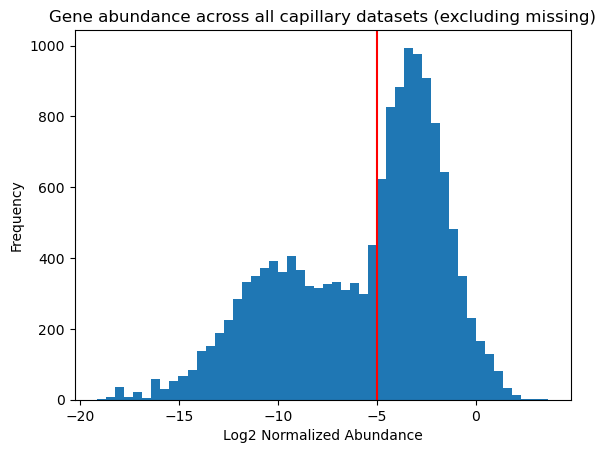

In [90]:
cap_abundance = uniprot_e[cap_cols].mean(axis=1)
cap_abundance = cap_abundance[cap_abundance > 0]

thresh = -5

fig, ax = plt.subplots()
ax.hist(np.log2(cap_abundance), bins=50)
ax.axvline(x=thresh, color='red')
ax.set_xlabel('Log2 Normalized Abundance')
ax.set_ylabel('Frequency')
ax.set_title('Gene abundance across all capillary datasets (excluding missing)')
plt.show()

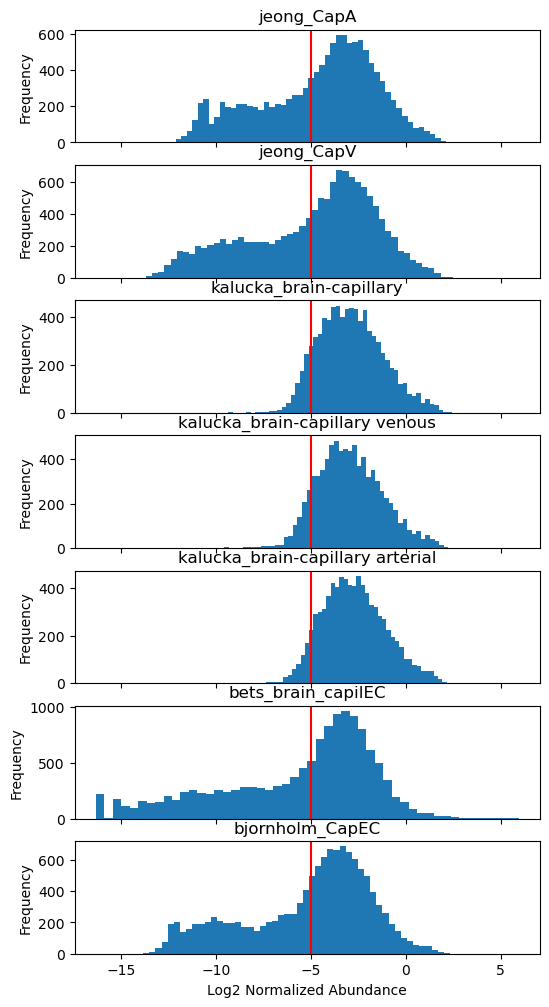

In [91]:
fig, axes = plt.subplots(nrows=len(cap_cols), ncols=1, sharex=True, figsize=(6, 12))

thresh = -5

for i, cap_col in enumerate(cap_cols):
    ax = axes[i]
    cap_abundance = uniprot_e[cap_col]
    cap_abundance = cap_abundance[cap_abundance > 0]

    ax.hist(np.log2(cap_abundance), bins=50)
    
    ax.axvline(x=thresh, color='red')
    
    if i == len(cap_cols) - 1:
        ax.set_xlabel('Log2 Normalized Abundance')
    ax.set_ylabel('Frequency')
    ax.set_title(cap_col)

plt.show()

In [92]:
uniprot_e.columns

Index(['gene', 'Reviewed', 'Entry Name', 'Protein names', 'Gene Names',
       'Organism', 'Length', 'Gene Names (synonym)', 'Transmembrane',
       'Subcellular location [CC]',
       ...
       'bjornholm_Pericyte', 'bjornholm_Erythrocyte', 'bjornholm_ArtEC',
       'bjornholm_VenEC', 'bjornholm_Myeloid', 'bjornholm_Astrocyte',
       'bjornholm_B-lymphocyte', 'bjornholm_ChP epithelial',
       'bjornholm_T-lymphocyte', 'bjornholm_Fibroblast'],
      dtype='object', length=143)

In [93]:
2**(thresh)

0.03125

In [94]:
np.sum(uniprot_e[cap_cols].mean(axis=1) > 2**(thresh))

8130

In [95]:
uniprot_e.insert(12, 'cap_expression_above_threshold', uniprot_e[cap_cols].mean(axis=1) > 2**(thresh))
uniprot_e.insert(12, 'cap_expression', uniprot_e[cap_cols].mean(axis=1))
uniprot_e.head()

,gene,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],...,bjornholm_Pericyte,bjornholm_Erythrocyte,bjornholm_ArtEC,bjornholm_VenEC,bjornholm_Myeloid,bjornholm_Astrocyte,bjornholm_B-lymphocyte,bjornholm_ChP epithelial,bjornholm_T-lymphocyte,bjornholm_Fibroblast
Entry,,,,,,,,,,,,,,,,,,,,,
A0A087WPF7,Auts2,reviewed,AUTS2_MOUSE,Autism susceptibility gene 2 protein homolog,Auts2 Kiaa0442,Mus musculus (Mouse),1261,Kiaa0442,None,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.097686,0.137003,0.390969,0.907178,0.025558,0.190598,0.010238,0.100040,0.070561,0.624372
A0A088MLT8,Schip1,reviewed,IQIP1_MOUSE,IQCJ-SCHIP1 readthrough transcript protein,Iqcj-Schip1 Iqschfp Schip1,Mus musculus (Mouse),559,Iqschfp Schip1,None,"SUBCELLULAR LOCATION: Cell projection, axon {E...",...,0.131164,0.049715,0.137279,0.081022,0.000000,0.060567,0.000000,0.049424,0.004872,0.000000
A0A0A6YXX9,Gm16432,reviewed,CTSEL_MOUSE,Cation channel sperm-associated protein subuni...,Catspere2 Gm16432,Mus musculus (Mouse),775,Gm16432,None,None,...,0.000000,0.002838,0.001947,0.004609,0.000000,0.000000,0.000000,0.037353,0.000000,0.000000
A0A0A6YY25,Btbd18,reviewed,BTBDI_MOUSE,BTB/POZ domain-containing protein 18,Btbd18,Mus musculus (Mouse),723,None,None,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,...,0.002253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A0A0B4J1F4,Arrdc4,reviewed,ARRD4_MOUSE,Arrestin domain-containing protein 4,Arrdc4,Mus musculus (Mouse),415,None,None,SUBCELLULAR LOCATION: Early endosome {ECO:0000...,...,0.016081,0.006091,0.008779,0.028367,0.099269,0.008379,0.000000,0.015422,0.014028,0.188282


In [96]:
uniprot_e.loc[:,['cap_expression', 'cap_expression_above_threshold']]

,cap_expression,cap_expression_above_threshold
Entry,,
A0A087WPF7,0.102514,True
A0A088MLT8,0.131126,True
A0A0A6YXX9,0.000284,False
A0A0A6YY25,0.000976,False
A0A0B4J1F4,0.006805,False
...,...,...
S4R2P9,0.000000,False
T1NXB5,0.002651,False
V9GXG1,0.000954,False


In [97]:
uniprot_e.to_csv('/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/240710_uniprot_membrane_proteins+capillary_expression_v4.csv', 
                 index_label='Entry')

In [98]:
!head '/Volumes/Neurobio/GU LAB/PERSONAL FILES/Shamika/ECseq/Website coding/240710_uniprot_membrane_proteins+capillary_expression_v4.csv'

Entry,gene,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Names (synonym),Transmembrane,Subcellular location [CC],has_tm_annotation,cell_membrane_localization,cap_expression,cap_expression_above_threshold,jeong_Venous,jeong_CapA,jeong_CapV,jeong_REV,jeong_Arterial,kalucka_brain-capillary venous,kalucka_brain-artery shear stress,kalucka_brain-interferon,kalucka_brain-capillary,kalucka_brain-artery,kalucka_brain-capillary arterial,kalucka_brain-large artery,kalucka_brain-choroid plexus,kalucka_brain-large vein,kalucka_heart-capillary,kalucka_heart-large vein,kalucka_heart-capillary arterial,kalucka_heart-angiogenic,kalucka_heart-capillary venous,kalucka_heart-artery,kalucka_heart-interferon,kalucka_heart-lymphatic,kalucka_intestine_colon-capillary 2,kalucka_intestine_colon-capillary arterial,kalucka_intestine_colon-capillary 1,kalucka_intestine_colon-vein Madcam1+,kalucka_intestine_colon-artery,kalucka_intestine_colon-capillary Aqp7+,kalucka_intestine_colon-lymphatic,k